In [3]:
pip install gymnasium


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 5.9 MB/s eta 0:00:00


In [4]:
import gymnasium as gym
import numpy as np
import gym
import matplotlib.pyplot as plt


In [5]:
env=gym.make("Taxi-v3")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [6]:
env.reset()

132

In [7]:
img=env.render(mode="rgb_array")


/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


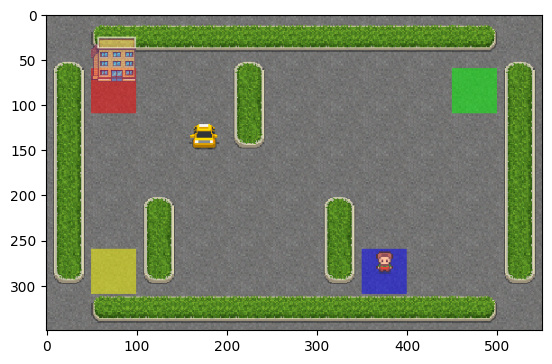

In [8]:
plt.imshow(img)
plt.show()

There are 500 states and 6 actions.

In [9]:
n_states=env.observation_space.n
n_actions=env.action_space.n

In [10]:
Q=np.zeros([n_states,n_actions])

In [11]:
Q

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [12]:
G=0 #G is for sum of rewards.
alpha=0.618

Now i will apply for 1 episode.

In [13]:
for episode in range(1,2):
  done=False
  G,reward=0,0
  state=env.reset()
  while reward!=20:
    action=np.argmax(Q[state])
    state2,reward,done,info=env.step(action)
    Q[state,action]+=alpha*(reward+np.max(Q[state2])-Q[state,action])
    G+=reward
    state=state2

print("all reward {}".format(G))




all reward -1132


In [14]:
Q

array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [-0.618, -0.618, -0.618, -0.618,  0.   ,  0.   ]])

In [15]:
episodes=3000
Q=np.zeros([n_states,n_actions])

In [16]:
for episode in range(1,episodes+1):
  done=False
  G,reward=0,0
  state=env.reset()
  while reward!=20:
    action=np.argmax(Q[state])
    state2,reward,done,info=env.step(action)
    Q[state,action]+=alpha*(reward+np.max(Q[state2])-Q[state,action])
    G+=reward
    state=state2
  if episode%100==0:
    print("episode:{} sum of reward:{}".format(episode,G))



episode:100 sum of reward:-29
episode:200 sum of reward:9
episode:300 sum of reward:3
episode:400 sum of reward:10
episode:500 sum of reward:5
episode:600 sum of reward:11
episode:700 sum of reward:6
episode:800 sum of reward:9
episode:900 sum of reward:9
episode:1000 sum of reward:9
episode:1100 sum of reward:6
episode:1200 sum of reward:14
episode:1300 sum of reward:7
episode:1400 sum of reward:7
episode:1500 sum of reward:6
episode:1600 sum of reward:9
episode:1700 sum of reward:9
episode:1800 sum of reward:5
episode:1900 sum of reward:14
episode:2000 sum of reward:10
episode:2100 sum of reward:10
episode:2200 sum of reward:7
episode:2300 sum of reward:5
episode:2400 sum of reward:7
episode:2500 sum of reward:5
episode:2600 sum of reward:13
episode:2700 sum of reward:8
episode:2800 sum of reward:7
episode:2900 sum of reward:4
episode:3000 sum of reward:9


In [17]:
actions={
          0:"South",
          1:"North",
          2:"East",
          3:"West",
          4:"Pick Up",
          5:"Drop off"
}

In [20]:
state=env.reset()
done=None

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



 South


/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


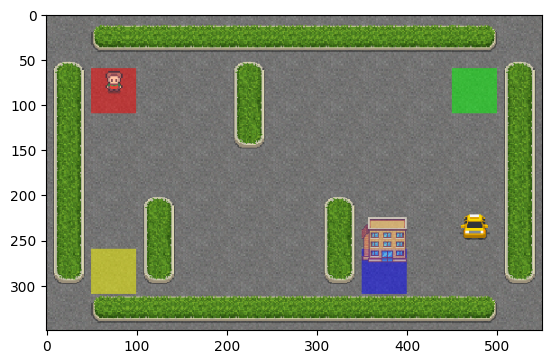


 West


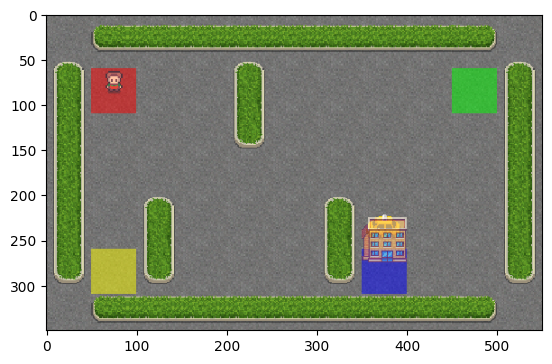


 North


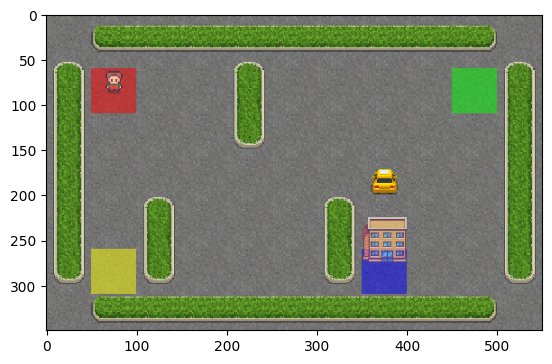


 West


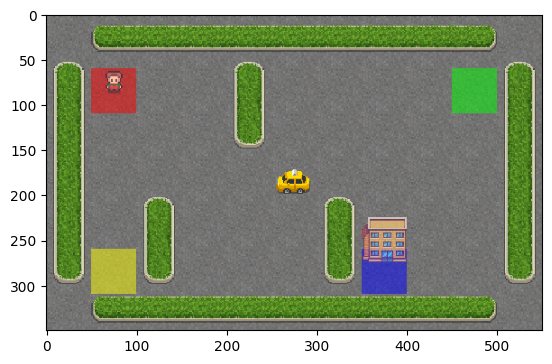


 West


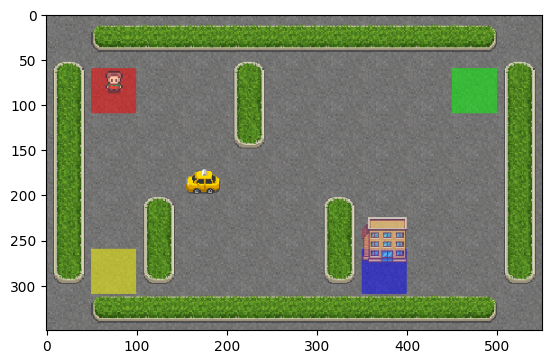


 West


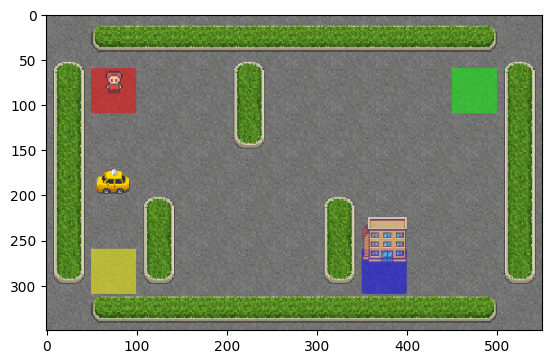


 North


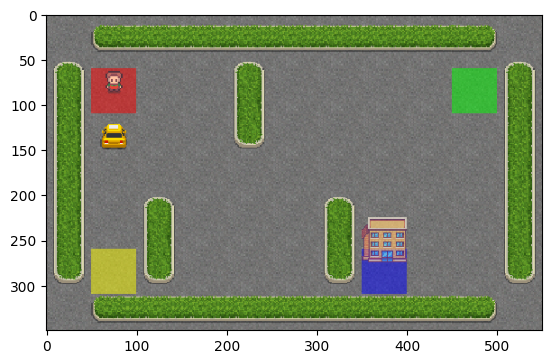


 North


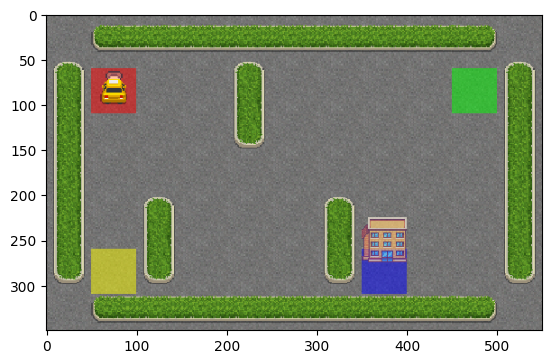


 Pick Up


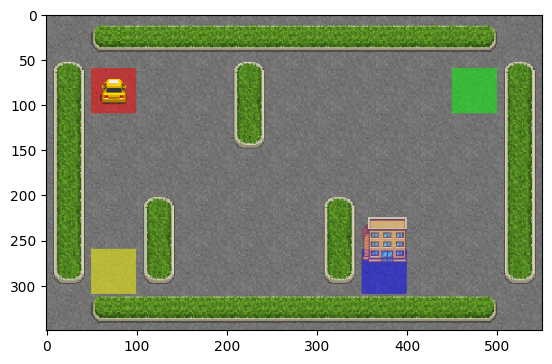


 South


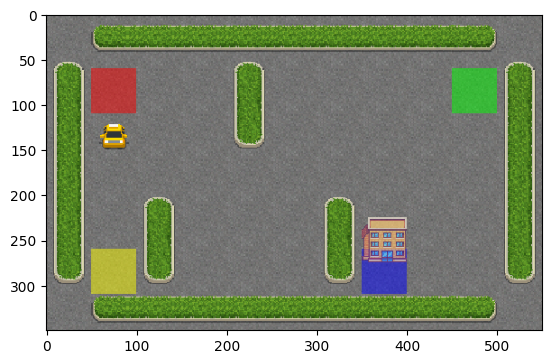


 South


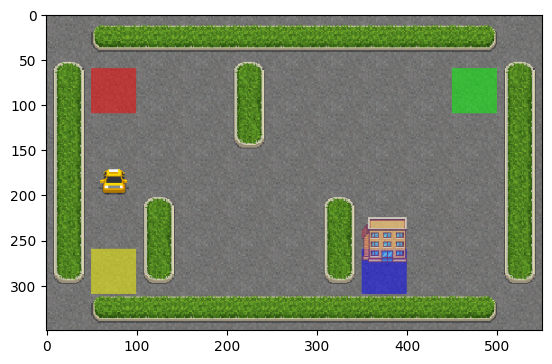


 East


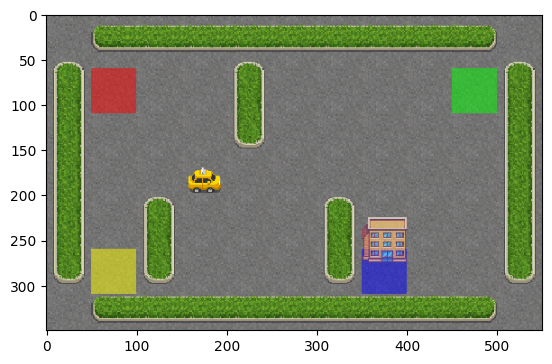


 East


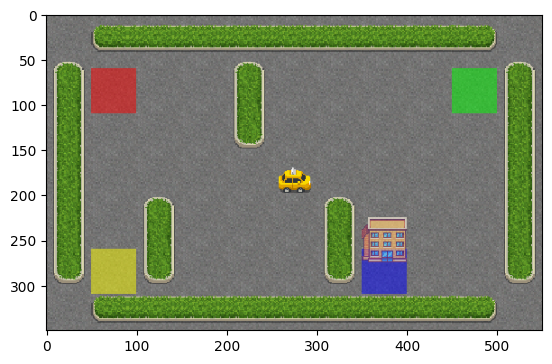


 East


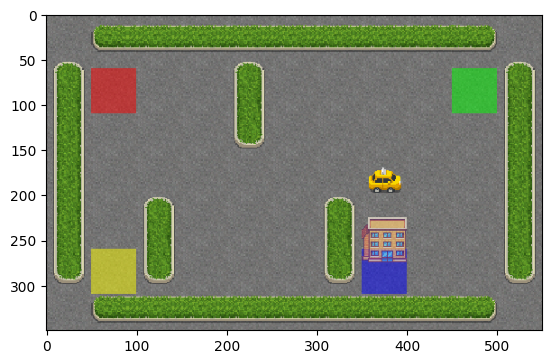


 South


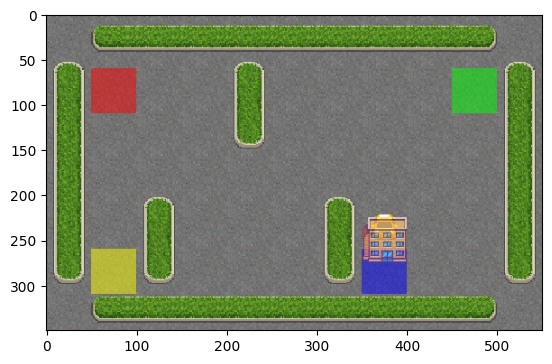


 South


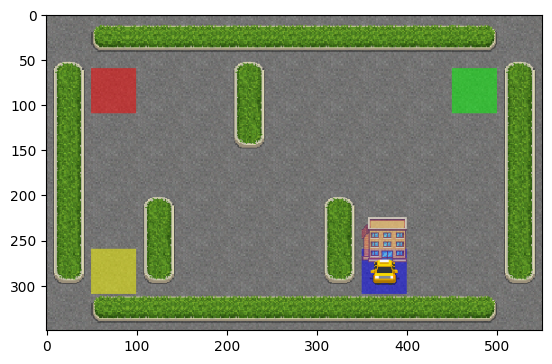


 Drop off


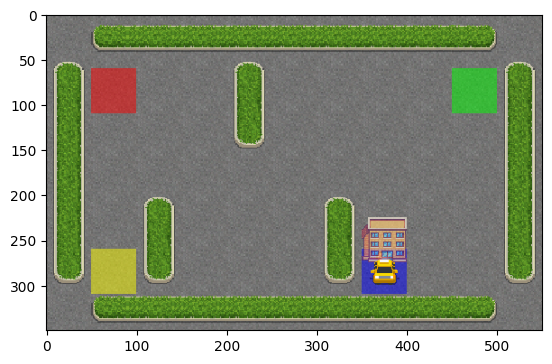

In [21]:
while done!=True:
  action=np.argmax(Q[state])
  state,reward,done,info=env.step(action)
  output=actions.get(action)
  print("\n",f"{output}")
  img=env.render(mode="rgb_array")
  plt.imshow(img)
  plt.show()
